### Data Exploration and Visualization

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the data
df_original = pd.read_csv('../data/house_data.csv')
df_copy = df_original.copy(deep=True)
df_copy

,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.5,Suburb,1956,Good
1,752000,2526,3,2.5,Downtown,1998,Excellent
2,319000,1622,2,1.5,Rural,1975,Fair
3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,462000,1835,2,2.0,Urban,1982,Good
...,...,...,...,...,...,...,...
79,530000,2080,3,2.0,Urban,1991,Good
80,372000,1640,2,1.5,Suburb,1963,Fair
81,592000,2220,3,2.0,Downtown,1985,Good
82,328000,1730,2,1.5,Rural,1965,Fair


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000

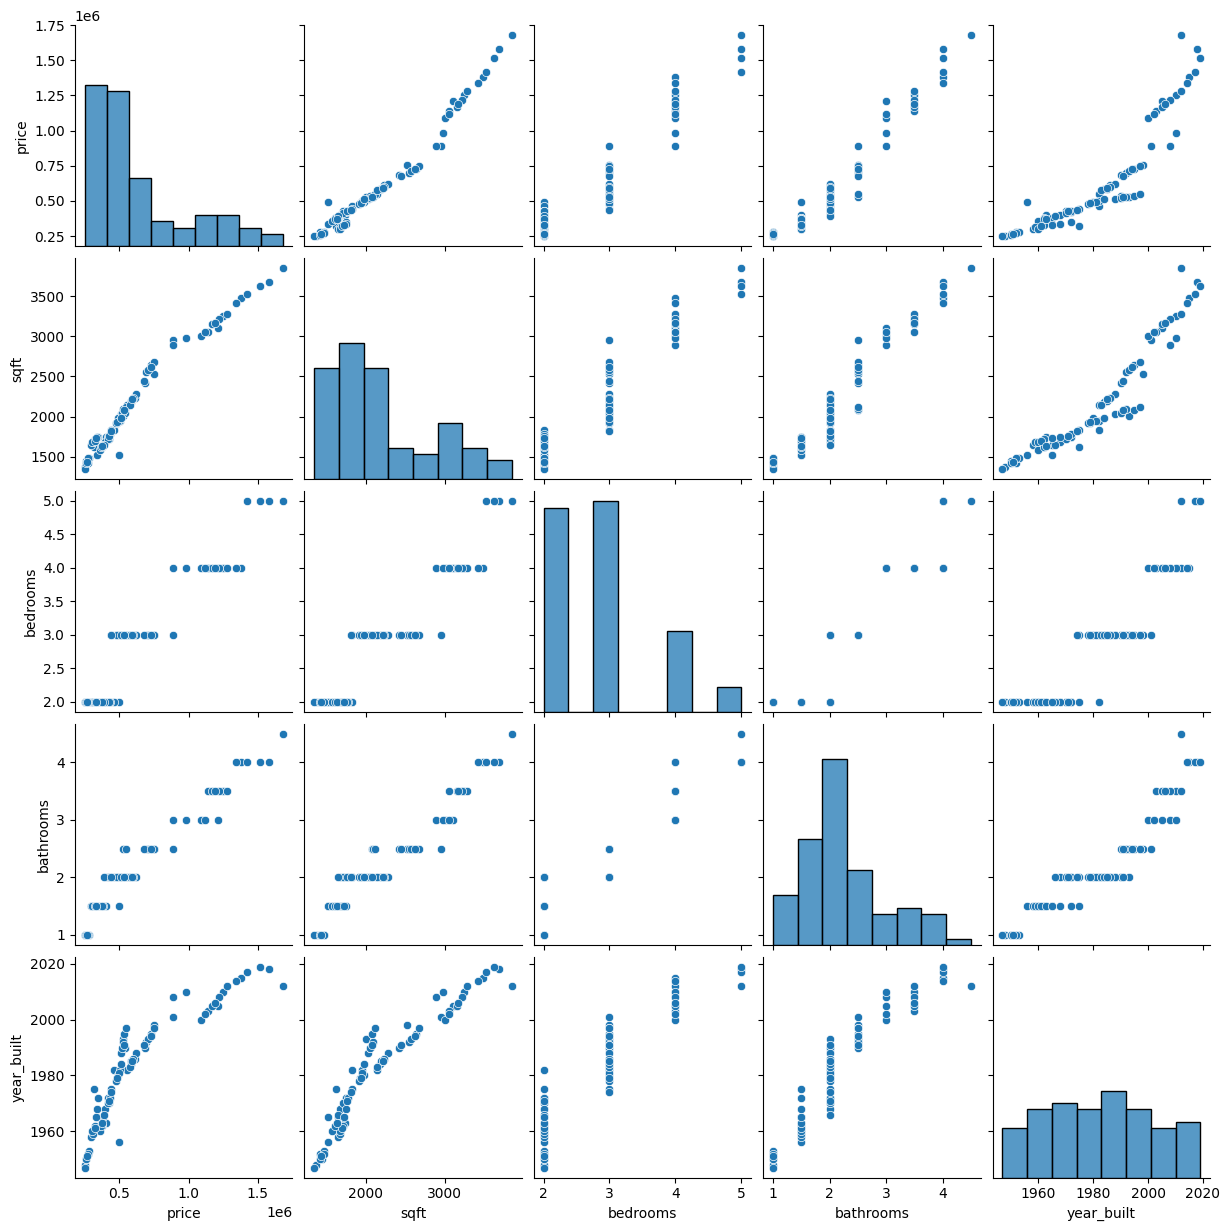

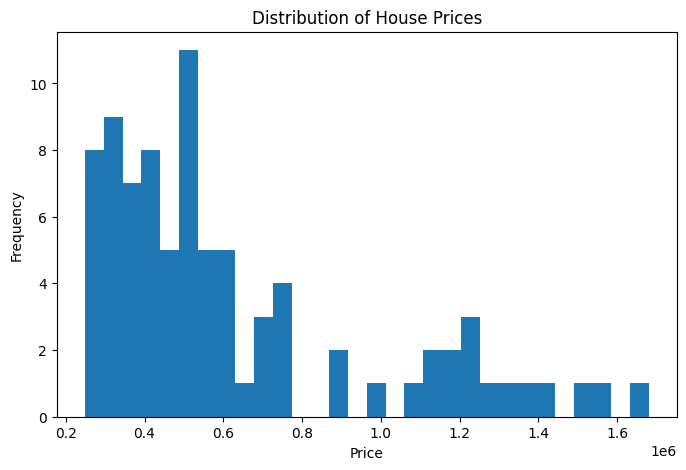

In [31]:
# Exploring the data
print(df_copy.info())
print("==================================")
print(df_copy.describe())
print("==================================")
print(df_copy.isnull().sum())
print("==================================")

sns.pairplot(df_copy)

plt.figure(figsize=(8,5))
plt.hist(df_copy['price'], bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()